<a href="https://colab.research.google.com/github/xl-tang01/Diffusion-model-Demo/blob/main/LDM%20for%20text-to-image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIAA 5026 - homework 2 Runtime

### Install the dependencies

In [4]:
!pip install diffusers transformers easydict torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.5 MB/s eta 0:00:00


### Initialize the pretrained LDM model

In [5]:
import torch
from easydict import EasyDict
from transformers import CLIPTextModel, CLIPTokenizer, logging
from diffusers import AutoencoderKL, UNet2DConditionModel


model_id = 'CompVis/stable-diffusion-v1-4'

# Initializing LDM components
LDM = EasyDict()
LDM.vae = AutoencoderKL.from_pretrained(model_id, subfolder='vae')
LDM.tokenizer = CLIPTokenizer.from_pretrained(model_id, subfolder='tokenizer')
LDM.text_encoder = CLIPTextModel.from_pretrained(model_id, subfolder="text_encoder")
LDM.unet = UNet2DConditionModel.from_pretrained(model_id, subfolder="unet")

# to gpu
_execution_device = 'cuda' if torch.cuda.is_available() else 'cpu'
LDM.vae.to(_execution_device)
LDM.text_encoder.to(_execution_device)
LDM.unet.to(_execution_device)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

## Complete the blanks in the following codes!

Tips:

All codes that you need to complete is warped in:

```python
# TODO: task descrpition

# Your codes here

# End TODO
```


### Step 1. Complete the DDPM scheduler

In [6]:
import torch

class DDPM_scheduler():
    def __init__(self,
                 beta_start = 0.00085,
                 beta_end = 0.012,
                 num_train_timesteps = 1000):
        '''init the DDPM scheduler
        Args:
            beta_start (float): start of the beta interval
            beta_end (float): end of the beta interval
            num_train_timesteps (int): the number of denoising steps
        '''
        
        # TODO: you should implement the instance variables of the DDPM scheduler
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.num_train_timesteps = num_train_timesteps
        self.betas = torch.linspace(beta_start, beta_end, num_train_timesteps)
        self.sigma = torch.zeros(num_train_timesteps)
        self.alphas = 1 - self.betas
        self.one = torch.tensor(1.0)
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)

        # End TODO
        
        self.timesteps = torch.linspace(num_train_timesteps-1, end=0, steps=num_train_timesteps, dtype=torch.int).to(device)
      
    
    def add_noise(
        self,
        original_samples: torch.FloatTensor,
        noise: torch.FloatTensor,
        timesteps: torch.IntTensor,
    ) -> torch.FloatTensor:
        '''add noise to the original (clean) sample
        Args:
            original_samples: the original (clean) sample
            noise: the noise
            timesteps: the steps of the diffusion process
        Returns:
            noisy_samples: the sample with 'timesteps' steps of noise
        '''
        
        # Tips: Make sure your parameters and timestep have same device and dtype as original_samples
        
        # TODO
        
        alphas_cumprod = self.alphas_cumprod.to(device=original_samples.device, dtype=original_samples.dtype)
        timesteps = timesteps.to(original_samples.device)

        sqrt_alpha_prod = alphas_cumprod[timesteps] ** 0.5
        sqrt_alpha_prod = sqrt_alpha_prod.flatten()
        while len(sqrt_alpha_prod.shape) < len(original_samples.shape):
            sqrt_alpha_prod = sqrt_alpha_prod.unsqueeze(-1)

        sqrt_one_minus_alpha_prod = (1 - alphas_cumprod[timesteps]) ** 0.5
        sqrt_one_minus_alpha_prod = sqrt_one_minus_alpha_prod.flatten()
        while len(sqrt_one_minus_alpha_prod.shape) < len(original_samples.shape):
            sqrt_one_minus_alpha_prod = sqrt_one_minus_alpha_prod.unsqueeze(-1)

        noisy_samples = sqrt_alpha_prod * original_samples + sqrt_one_minus_alpha_prod * noise
        return noisy_samples
        
        # End TODO

        return noisy_samples

    def step(
            self,
            model_output: torch.FloatTensor,
            timestep: int,
            sample: torch.FloatTensor,
            **kwargs
        ):
        '''predict the previous sample
        Args:
            model_output: the noise prediction of the model at current timestep
            timestep: current timestep
            sample: the noisy latent of current timestep
            generator: 
        Returns:
            (pred_prev_sample,) (Tuple): the noisy latent of current timestep - 1
        '''
        # TODO: predict the previous sample

        # compute alphas and betas
        t = timestep
        index = (self.timesteps == timestep).nonzero(as_tuple=True)[0][0]
        if index == self.timesteps.shape[0] - 1:
            prev_t = torch.tensor(-1)
        else:
            prev_t = self.timesteps[index + 1]
        
        alpha_prod_t = self.alphas_cumprod[t]
        alpha_prod_t_prev = self.alphas_cumprod[prev_t] if prev_t >= 0 else self.one
        beta_prod_t = 1 - alpha_prod_t
        beta_prod_t_prev = 1 - alpha_prod_t_prev
        current_alpha_t = alpha_prod_t / alpha_prod_t_prev
        current_beta_t = 1 - current_alpha_t

        # compute predicted original sample from predicted noise
        x_0 = (sample - beta_prod_t ** (0.5) * model_output) / (alpha_prod_t ** (0.5))
        # compute coefficients for pred_original_sample x_0 and current sample x_t
        coeff1 = (alpha_prod_t_prev ** (0.5) * current_beta_t) / beta_prod_t
        coeff2 = current_alpha_t ** (0.5) * beta_prod_t_prev / beta_prod_t
        # compute predicted previous sample µ_t
        pred_prev_sample = coeff1 * x_0 + coeff2 * sample
        # add noise
        variance = 0
        if t > 0:
            variance_noise = torch.randn(
                model_output.shape, device=model_output.device, dtype=model_output.dtype
            )
            sigma_t = (1 - alpha_prod_t_prev) / (1 - alpha_prod_t) * current_beta_t
            sigma_t = torch.clamp(sigma_t, min=1e-20)
            variance = (sigma_t ** 0.5) * variance_noise
        pred_prev_sample = pred_prev_sample + variance

          
          # End TODO
        return (pred_prev_sample,)

### Step 2. Complete the Classifier-free guidance in the inference function


In [7]:
from tqdm import tqdm    
import numpy as np
import torch.nn.functional as F

def conditional_ldm_inference(model, scheduler, size=(512, 512), images=None, strength=1.0,
                              prompt='', negative_prompt='', classifier_free_guidance=1.0,
                              generator=None, device='cuda'):
    with torch.no_grad():
        # 1. initialize the inference timesteps
        timesteps = scheduler.timesteps
        inference_steps = int(np.floor(strength * len(timesteps)))
        timesteps = timesteps[-inference_steps:]
        
        # 2. initialize the latent
        if images is None:
            images = torch.zeros((1, 3, size[0], size[1]), dtype=torch.float, device=device)
        init_latent = model.vae.encode(images).latent_dist.sample(generator) * 0.18215

        # add noise to the latent
        noise = torch.randn_like(init_latent)
        noisy_latent = scheduler.add_noise(init_latent, noise, timesteps[0])
        
        # 3. initialize the text condition
        text_inputs = model.tokenizer(prompt, padding="max_length", max_length=model.tokenizer.model_max_length, truncation=True, return_tensors="pt", ).input_ids
        text_embeddings = model.text_encoder(text_inputs.to(device))[0]
        
        # 4. classifier free guidance
        if classifier_free_guidance > 1.0:
            neg_text_inputs = model.tokenizer(negative_prompt, padding="max_length", max_length=model.tokenizer.model_max_length, truncation=True, return_tensors="pt", ).input_ids
            neg_text_embeddings = model.text_encoder(neg_text_inputs.to(device))[0]
            text_embeddings = torch.cat([neg_text_embeddings, text_embeddings], dim=0)
                
        # 5. run the DDPM loop
        for timestep in tqdm(timesteps, desc='Processing'):
            latent_model_input = torch.cat([noisy_latent] * 2) if classifier_free_guidance > 1.0 else noisy_latent
            noise_pred = model.unet(latent_model_input, timestep, encoder_hidden_states=text_embeddings).sample

            if classifier_free_guidance > 1.0:
                noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                # TODO: your codes here! Complete the Classifier free guidance!

                # apply the guidance to the noise prediction
                noise_pred = noise_pred_uncond + classifier_free_guidance * (noise_pred_text - noise_pred_uncond)

                # End TODO
            
            noisy_latent = scheduler.step(noise_pred, timestep, noisy_latent, return_dict=False)[0]
        
        # 6. decode the noisy latent
        result = model.vae.decode(noisy_latent / 0.18215).sample
        torch.cuda.empty_cache()
        
        return result


## Generate something!

Processing: 100%|██████████| 1000/1000 [07:51<00:00,  2.12it/s]


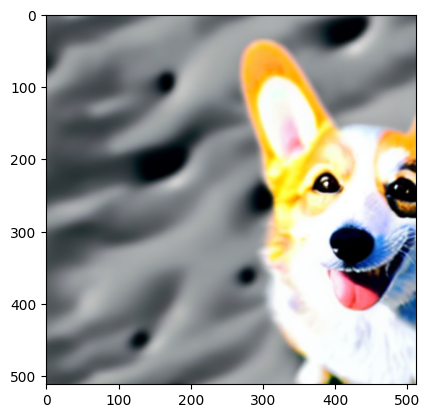

In [8]:
import cv2
import matplotlib.pyplot as plt


def tensor2img_fast(tensor, rgb2bgr=True, min_max=(0, 1)):
    """This implementation is slightly faster than tensor2img.
    It now only supports torch tensor with shape (1, c, h, w).

    Args:
        tensor (Tensor): Now only support torch tensor with (1, c, h, w).
        rgb2bgr (bool): Whether to change rgb to bgr. Default: True.
        min_max (tuple[int]): min and max values for clamp.
    """
    output = tensor.squeeze(0).detach().clamp_(*min_max).permute(1, 2, 0)
    output = (output - min_max[0]) / (min_max[1] - min_max[0]) * 255
    output = output.type(torch.uint8).cpu().numpy()
    if rgb2bgr:
        output = cv2.cvtColor(output, cv2.COLOR_RGB2BGR)
    return output

def plt_tensor(tensor_, fig_name=''):
    from PIL import Image
    cv2_img = tensor2img_fast(tensor_, rgb2bgr=False, min_max=(-1, 1))
    plt.figure()
    plt.title(fig_name)
    plt.imshow(cv2_img)
    img = Image.fromarray(cv2_img,'RGB')
    img.save('sample_data/my.png')
# initialize your DDPM scheduler
ddpm_schedluer = DDPM_scheduler()

# generatate contents with a prompt
result = conditional_ldm_inference(model=LDM, scheduler=ddpm_schedluer, images=None, strength=1.0,
                                   prompt='A photo of a smiling corgi dog on the moon', classifier_free_guidance=7.5,
                                   device=_execution_device)

plt_tensor(result)



And you can also generate images with alternative schedulers with same inference loop. For example, the DDIM scheduler.

Processing: 100%|██████████| 30/30 [00:14<00:00,  2.14it/s]


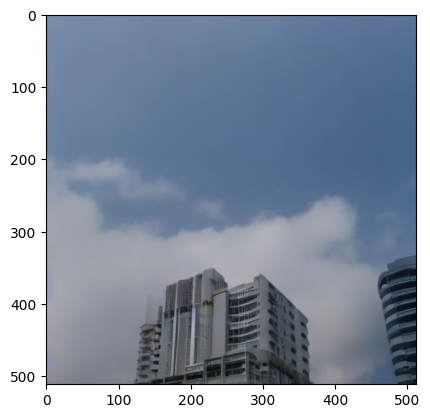

In [ ]:
from diffusers import DDIMScheduler

ddim_scheduler = DDIMScheduler.from_pretrained(model_id, subfolder='scheduler')
ddim_scheduler.set_timesteps(30, device=_execution_device)

result = conditional_ldm_inference(model=LDM, scheduler=ddim_scheduler, images=None, strength=1.0,
                                   prompt='A photo of HKUST', classifier_free_guidance=7.5,
                                   device=_execution_device)

plt_tensor(result)